In [1]:
from Dataproject import *

In this assignment, we are investigating a portfolio consisting of three different stocks. We would like to find the return of the portfolio, and the variances that the portfolio entails. In the end we want to find the optimal portfolio weights for the maximum return.

In [2]:
#Defining start and end dates
start_date = datetime.datetime(2019,1,1)
end_date = datetime.datetime(2022,4,1)

#Since several stocks will be pulled we define these variables 
stock1 = 'AAPL'
stock2 = 'MSFT'
stock3 = 'TSLA'

In [3]:
df1 = yf.download([stock1,stock2,stock3],start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


In [4]:
#Using the portfolio return formular
weights = [0.0,0.0,1.0]
df1 = yf.download([stock1,stock2,stock3],start=start_date, end=end_date)
df1 = df1['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [5]:
#We are only interested in the adjusted close prices
#Normalizing daily adjusted returns
df = np.log(1+ df1.pct_change())


The portfolio return is given as
$$\begin{equation} E(x)=w_1*\mu_1+w_2*\mu_2+...+w_n*\mu_n \end{equation}$$
where $w_n$ is the weight of the asset $n$ and $\mu_n$ is the mean return of asset $n$ 

In [6]:
weights = [0.25,0.25,0.5]

In [7]:
#Using the portfolio return formular
applegrowth = (df1.AAPL.iloc[-1]-df1.AAPL.iloc[0])/df1.AAPL.iloc[0]*100
microsoftgrowth = (df1.MSFT.iloc[-1]-df1.MSFT.iloc[0])/df1.MSFT.iloc[0]*100
teslagrowth = (df1.TSLA.iloc[-1]-df1.TSLA.iloc[0])/df1.TSLA.iloc[0]*100

portfolio_return=weights[0]*applegrowth+weights[1]*microsoftgrowth+weights[2]*teslagrowth

print('the return of the portfolio is ' + "%.2f" % portfolio_return + "%")

the return of the portfolio is 902.31%


The portfolio variance is given as
$$\begin{equation} Var(x)=w_1^2*\sigma_1^2+w_2^2*\sigma_2^2+w_3^2*\sigma_3^2+2*w_1*w_2*Cov_{1,2}+2*w_1*w_3*Cov_{1,3}+2*w_2*w_3*Cov_{2,3} \end{equation}$$
where $w$ is the weight of the asset, $\sigma$ is the standard deviation of asset and $Cov_{x,y}$ is the covariance between asset $x,y$

In [8]:
#Finding the covariance
df.cov()

,AAPL,MSFT,TSLA
AAPL,0.000455,0.000319,0.000421
MSFT,0.000319,0.000371,0.000382
TSLA,0.000421,0.000382,0.001793


In [9]:
#solving the variance for the portfolio
pv = weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+weights[2]**2*df.cov().iloc[2,2]+2*weights[0]*weights[1]*df.cov().iloc[0,1]+2*weights[0]*weights[2]*df.cov().iloc[0,2]+2*weights[1]*weights[2]*df.cov().iloc[1,2]

#solving with numpy dot product
portfolio_var= np.dot(np.dot(df.cov(), weights),weights)

#portfolio standard deviation
std=pv**(1/2)
portfolio_std=portfolio_var**(1/2)

#Defining a variable for portfolio standard deviation. the np.sqrt(250) is the annualized standard deviation
def portfoliostd(weights):
    return (np.dot(np.dot(df.cov(), weights),weights))**(1/2)*np.sqrt(250)

print('the variance of the portfolio is ' + "%.6f" % pv, 'and the portfolio standard variation is ' + "%.6f" % pv**(1/2) + ' (Using formular)')

print('the variance of the portfolio is ' + "%.6f" %  portfolio_var, 'and the portfolio standard variation is ' + "%.6f" %  portfolio_var**(1/2) + ' (Using numpy)')

the variance of the portfolio is 0.000741 and the portfolio standard variation is 0.027214 (Using formular)
the variance of the portfolio is 0.000741 and the portfolio standard variation is 0.027214 (Using numpy)


Random portfolio weights for the efficient frontier

In [10]:
def weightscreator(df):
    rand = np.random.random(len(df.columns)) #using len to take the column length of our dataframe - scalable if more stocks will be included
    rand /= rand.sum() #as the sum of the weights always should be 1
    return rand

weightscreator(df)

array([0.37716195, 0.35731229, 0.26552576])

In [12]:
returns =[]
stds = []
w = []

for i in range(500):
    weights =weightscreator(df) #getting 500 different weights
    returns.append(np.dot(df.mean(),weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

Text(0, 0.5, 'Portfolioreturn')

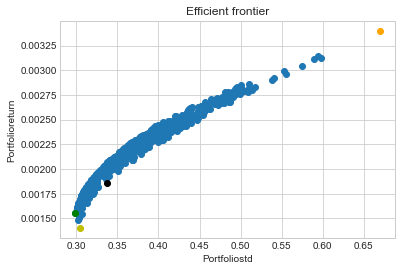

In [13]:
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k') 
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='y')
plt.scatter(df.std().iloc[2]*np.sqrt(250),df.mean().iloc[2],c='orange')
plt.scatter(min(stds),returns[stds.index(min(stds))], c='green') #minimum variance portfolio
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")

In [14]:
returns[stds.index(min(stds))] #Return on portfolio given minimum variance


0.0015530022353805982

In [15]:
w[stds.index(min(stds))] #Optimal portfolio weights in minimum variance portfolio. This makes intuitively sense, hence tesla has the lowest portfolio weight which can be explained by its very high volatility

array([0.31149376, 0.68253498, 0.00597126])